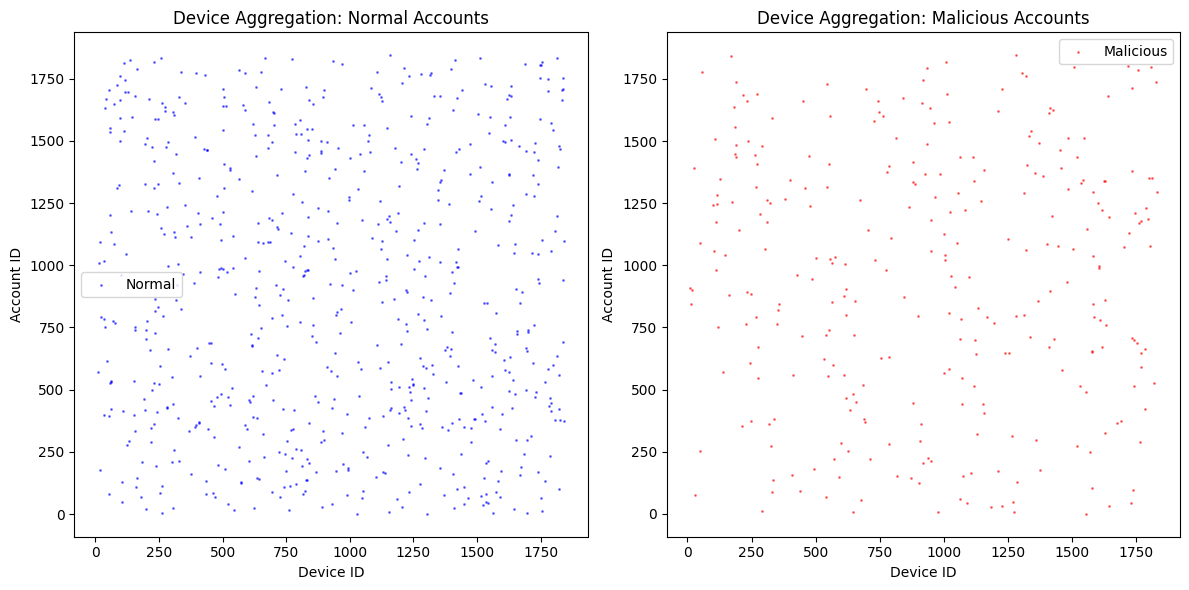

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

features_path = 'processed_features.csv'
edge_index_path = 'processed_edge_index.csv'

features_data = pd.read_csv(features_path)
edge_index_data = pd.read_csv(edge_index_path)

num_nodes = max(edge_index_data['source'].max(), edge_index_data['target'].max()) + 1
labels = np.random.choice(['normal', 'malicious'], size=num_nodes, p=[0.7, 0.3])

device_ids = edge_index_data['source']
account_ids = edge_index_data['target']

normal_accounts = edge_index_data[labels[account_ids] == 'normal']
malicious_accounts = edge_index_data[labels[account_ids] == 'malicious']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(normal_accounts['source'], normal_accounts['target'], s=1, alpha=0.5, label='Normal', color='blue')
plt.title("Device Aggregation: Normal Accounts")
plt.xlabel("Device ID")
plt.ylabel("Account ID")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(malicious_accounts['source'], malicious_accounts['target'], s=1, alpha=0.5, color='red', label='Malicious')
plt.title("Device Aggregation: Malicious Accounts")
plt.xlabel("Device ID")
plt.ylabel("Account ID")
plt.legend()

plt.tight_layout()
plt.show()


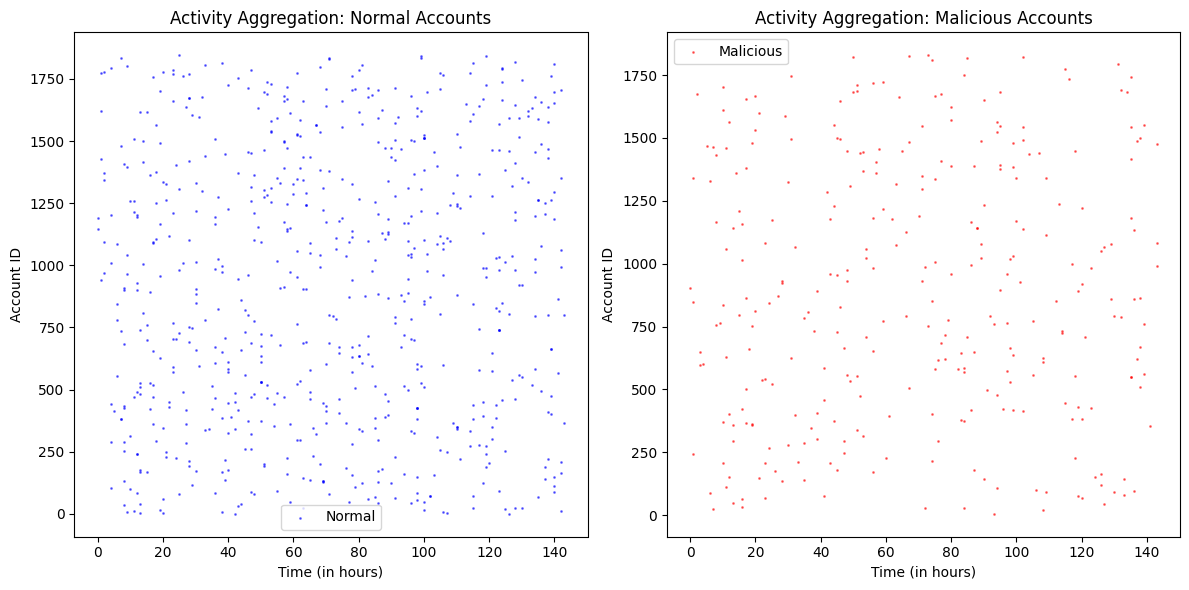

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

processed_features_path = 'processed_features.csv'
processed_edge_index_path = 'processed_edge_index.csv'

processed_features = pd.read_csv(processed_features_path)
processed_edge_index = pd.read_csv(processed_edge_index_path)


num_nodes = max(processed_edge_index['target'].max(), processed_edge_index['source'].max()) + 1
synthetic_activity_time = np.random.randint(0, 144, size=num_nodes)

labels = np.random.choice(['normal', 'malicious'], size=num_nodes, p=[0.7, 0.3])

node_to_time = {node: time for node, time in enumerate(synthetic_activity_time)}
node_to_label = {node: label for node, label in enumerate(labels)}

processed_edge_index['activity_time'] = processed_edge_index['target'].map(node_to_time)
processed_edge_index['label'] = processed_edge_index['target'].map(node_to_label)

normal_accounts = processed_edge_index[processed_edge_index['label'] == 'normal']
malicious_accounts = processed_edge_index[processed_edge_index['label'] == 'malicious']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(normal_accounts['activity_time'], normal_accounts['target'], s=1, alpha=0.5, label='Normal', color='blue')
plt.title("Activity Aggregation: Normal Accounts")
plt.xlabel("Time (in hours)")
plt.ylabel("Account ID")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(malicious_accounts['activity_time'], malicious_accounts['target'], s=1, alpha=0.5, label='Malicious', color='red')
plt.title("Activity Aggregation: Malicious Accounts")
plt.xlabel("Time (in hours)")
plt.ylabel("Account ID")
plt.legend()

plt.tight_layout()
plt.show()


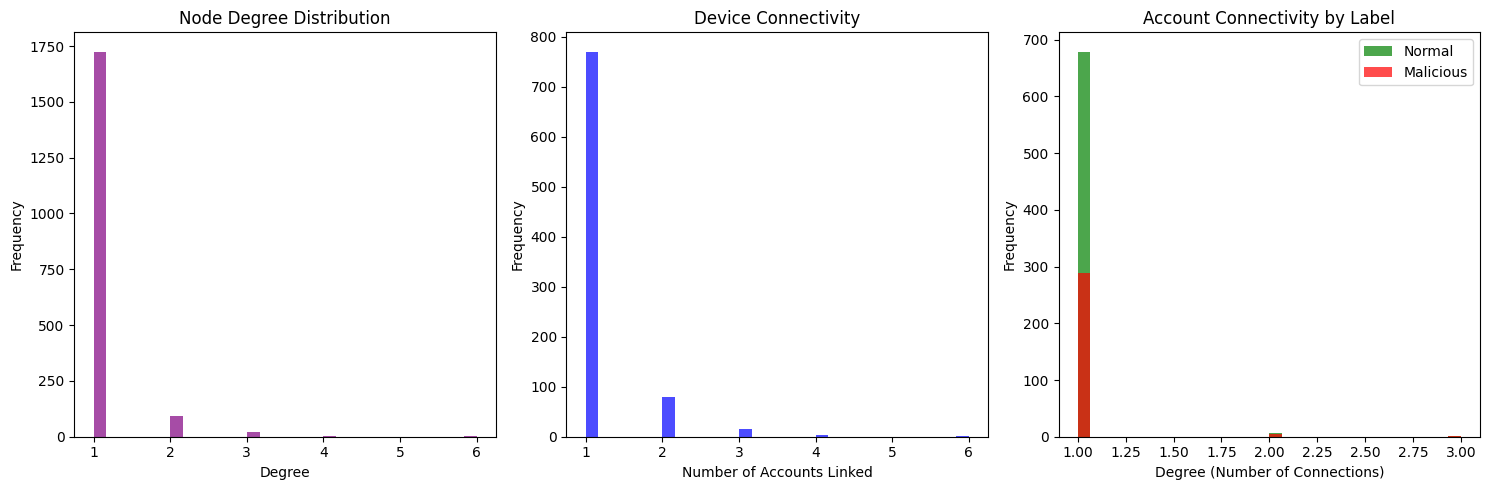

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

processed_features_path = 'processed_features.csv'
processed_edge_index_path = 'processed_edge_index.csv'

processed_features = pd.read_csv(processed_features_path)
processed_edge_index = pd.read_csv(processed_edge_index_path)

node_degrees = pd.concat([processed_edge_index['source'], processed_edge_index['target']]).value_counts()

device_degrees = processed_edge_index['source'].value_counts()
account_degrees = processed_edge_index['target'].value_counts()

num_nodes = max(processed_edge_index['source'].max(), processed_edge_index['target'].max()) + 1
labels = np.random.choice(['normal', 'malicious'], size=num_nodes, p=[0.7, 0.3])

processed_edge_index['label'] = processed_edge_index['target'].map({i: labels[i] for i in range(num_nodes)})
normal_accounts = processed_edge_index[processed_edge_index['label'] == 'normal']
malicious_accounts = processed_edge_index[processed_edge_index['label'] == 'malicious']

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(node_degrees, bins=30, alpha=0.7, color='purple')
plt.title("Node Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(device_degrees, bins=30, alpha=0.7, color='blue')
plt.title("Device Connectivity")
plt.xlabel("Number of Accounts Linked")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.hist(normal_accounts['target'].value_counts(), bins=30, alpha=0.7, label='Normal', color='green')
plt.hist(malicious_accounts['target'].value_counts(), bins=30, alpha=0.7, label='Malicious', color='red')
plt.title("Account Connectivity by Label")
plt.xlabel("Degree (Number of Connections)")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


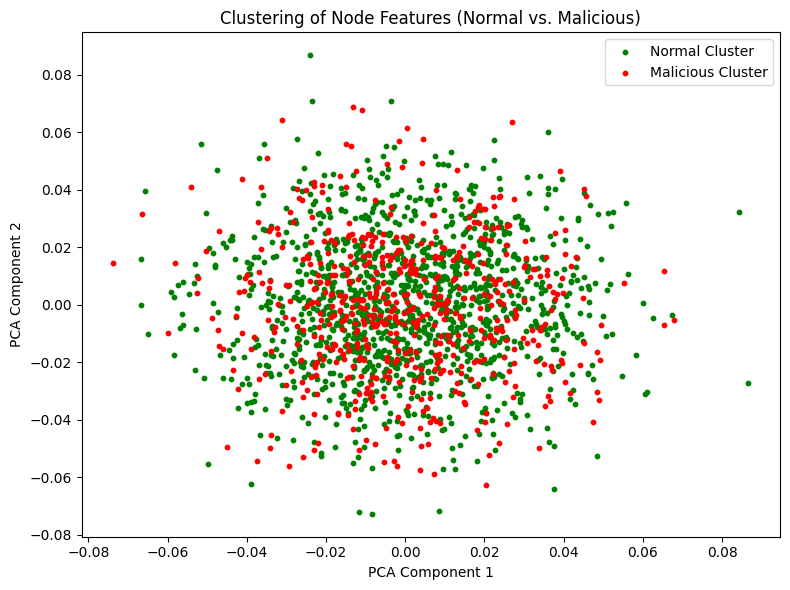

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

processed_features_path = 'processed_features.csv'
processed_features = pd.read_csv(processed_features_path)
node_features = processed_features.values

labels = np.random.choice(['normal', 'malicious'], size=node_features.shape[0], p=[0.7, 0.3])

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(node_features)

clusters = np.where(labels == 'normal', 0, 1)

plt.figure(figsize=(8, 6))
colors = ['green', 'red']

for cluster_id in [0, 1]:
    cluster_indices = (clusters == cluster_id)
    cluster_label = 'Normal' if cluster_id == 0 else 'Malicious'
    plt.scatter(
        reduced_features[cluster_indices, 0],
        reduced_features[cluster_indices, 1],
        s=10,
        color=colors[cluster_id],
        label=f'{cluster_label} Cluster'
    )

plt.title("Clustering of Node Features (Normal vs. Malicious)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.tight_layout()
plt.show()